#Loading Image and display sample

Image count per class:
freshapples          : 1693
freshbanana          : 1581
freshoranges         : 1466
rottenapples         : 2342
rottenbanana         : 2224
rottenoranges        : 1595
unripe apple         : 1934
unripe banana        : 2097
unripe orange        : 1285

Total images: 16217
Total classes: 9


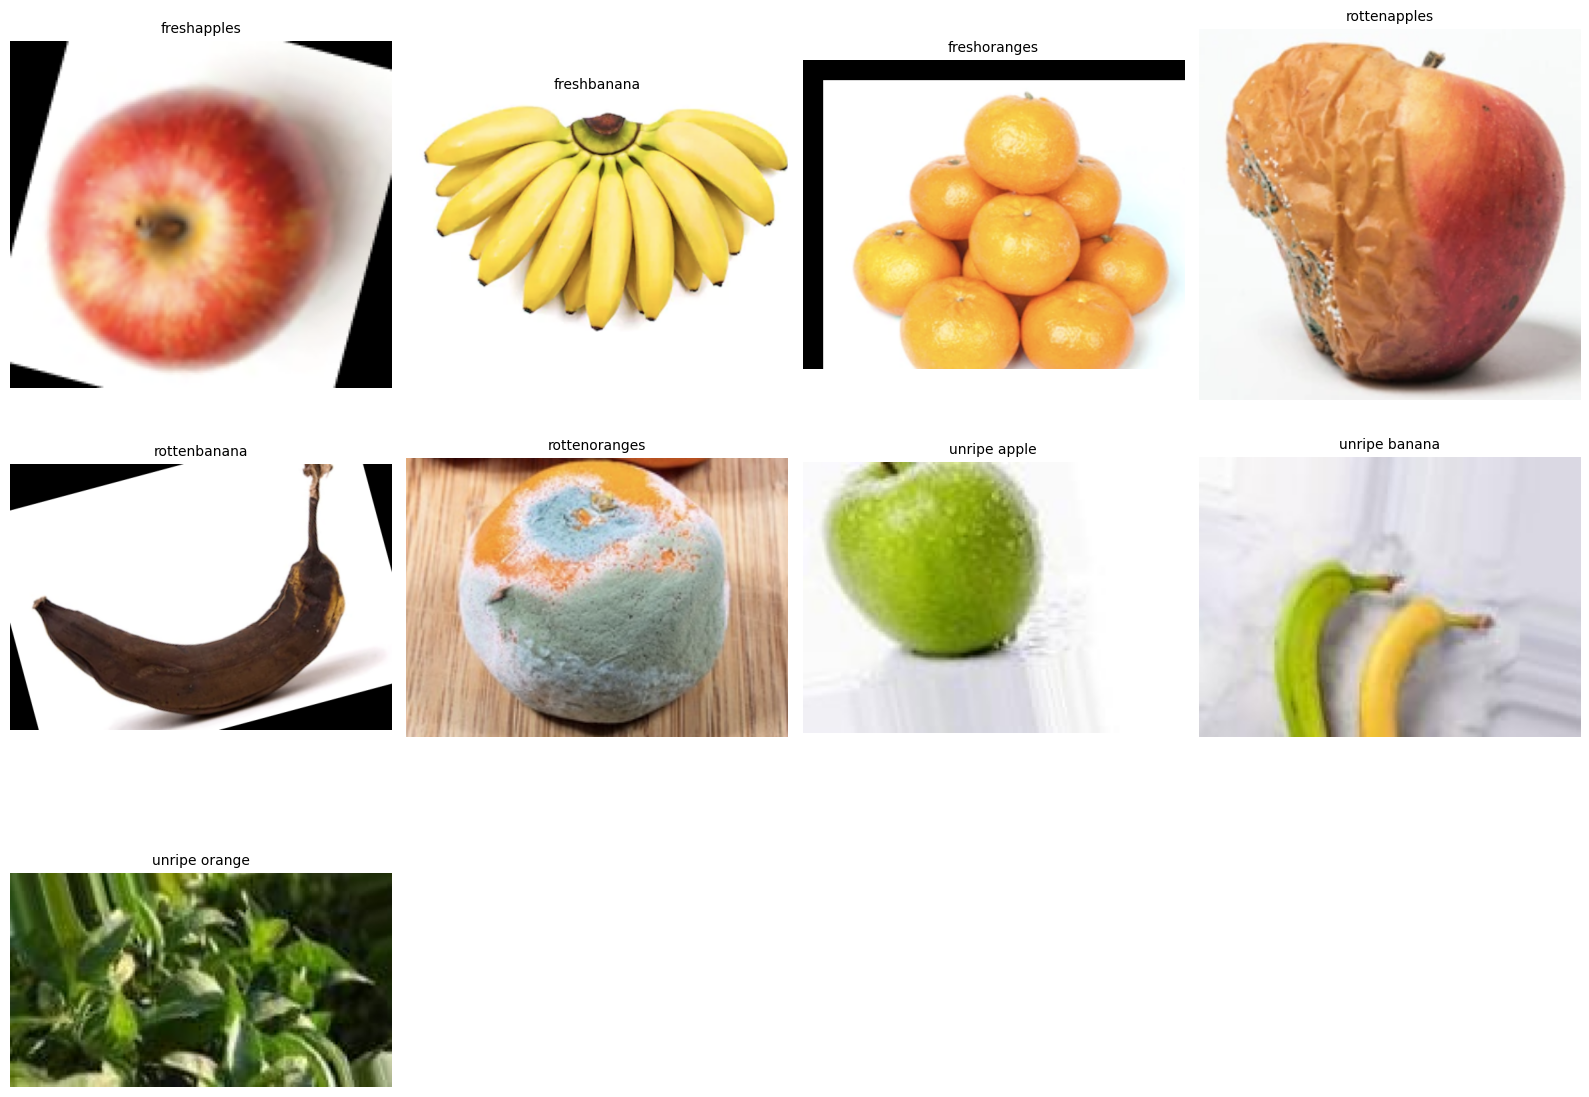

In [ ]:
from pathlib import Path
import random
from PIL import Image
import matplotlib.pyplot as plt

DATA_DIR = Path("data-set/Train")

IMG_EXTS = {".jpg", ".jpeg", ".png", ".bmp", ".webp"}

def is_image_file(p: Path) -> bool:
    return p.is_file() and p.suffix.lower() in IMG_EXTS

# class folders
class_dirs = sorted([p for p in DATA_DIR.iterdir() if p.is_dir()])
class_names = [p.name for p in class_dirs]

# map class name -> label id (0..num_classes-1)
label_map = {name: i for i, name in enumerate(class_names)}

# store everything here (will use this later for CNN training)
# each item = (image_path, label_id)
train_data = []

# also store counts for printing
class_counts = {}

for cls_dir in class_dirs:
    imgs = [p for p in cls_dir.rglob("*") if is_image_file(p)]
    class_counts[cls_dir.name] = len(imgs)

    label_id = label_map[cls_dir.name]
    for img_path in imgs:
        train_data.append((str(img_path), label_id))

# print image counts per class
print("Image count per class:")
for name in class_names:
    print(f"{name:20s} : {class_counts[name]}")

print("\nTotal images:", len(train_data))
print("Total classes:", len(class_names))

# show 1 sample image per class (optional but useful)
samples = []
for cls_dir in class_dirs:
    imgs = [p for p in cls_dir.rglob("*") if is_image_file(p)]
    if len(imgs) > 0:
        samples.append((cls_dir.name, random.choice(imgs)))

cols = 4
rows = (len(samples) + cols - 1) // cols

plt.figure(figsize=(cols * 4, rows * 4))
for i, (label, img_path) in enumerate(samples, start=1):
    img = Image.open(img_path).convert("RGB")
    ax = plt.subplot(rows, cols, i)
    ax.imshow(img)
    ax.set_title(label, fontsize=10)
    ax.axis("off")

plt.tight_layout()
plt.show()
